# HR Analytics 

Your client is a large MNC and they have 9 broad verticals across the organisation.
One of the problem your client is facing is around identifying the right people for promotion 
(only for manager position and below)and prepare them in time. Currently the process,
they are following is:



1)They first identify a set of employees based on recommendations/ past performance

2)Selected employees go through the separate training and evaluation program for each vertical.
  These programs are based on the required skill of each vertical.
    
3)At the end of the program, based on various factors such as training performance, 
  KPI completion (only employees with KPIs completed greater than 60% are considered) etc.,
  employee gets promotion.



For above mentioned process, the final promotions are only announced after the evaluation and 
this leads to delay in transition to their new roles. Hence, company needs your help in identifying 
the eligible candidates at a particular checkpoint so that they can expedite the entire promotion
cycle. 


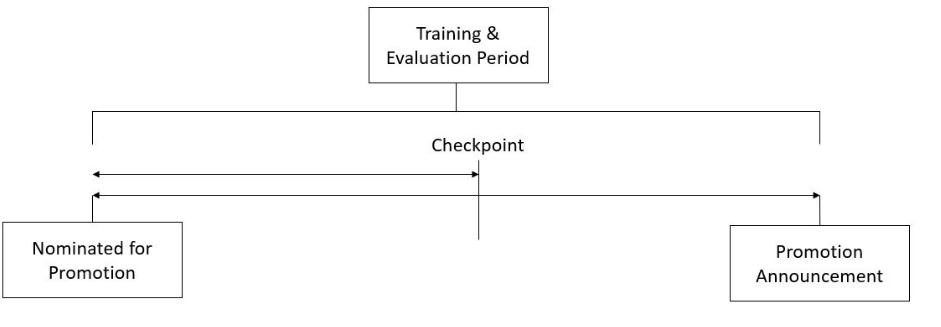

They have provided multiple attributes around Employee's past and current performance along with 
demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test 
set will be promoted or not after the evaluation process.


# Dataset Description
|Variable|Definition|
|:-------:|:--------:|
|employee_id|Unique ID for employee|
|department|Department of employee|
|region|Region of employment (unordered)|
|education|Education Level|
|gender|Gender of Employee|
|recruitment_channel|Channel of recruitment for employee|
|no_of_trainings|no of other trainings completed in previous year on soft skills, technical skills etc.|
|age|Age of Employee|
|previous_year_rating|Employee Rating for the previous year|
|length_of_service|Length of service in years|
|KPIs_met >80%|if Percent of KPIs(Key performance Indicators) >80% then 1 else 0|
|awards_won?|if awards won during previous year then 1 else 0|
|avg_training_score|Average score in current training evaluations|
|is_promoted|(Target) Recommended for promotion|
 

## Evaluation Metric
The evaluation metric for this competition is F1 Score.



Public and Private Split
Test data is further randomly divided into Public (40%) and Private (60%) data.


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import io
%cd "C:\Users\srava\github projects\project on HR Analytics"

C:\Users\srava\github projects\project on HR Analytics


In [3]:
# importing the train data set
hrtrain=pd.read_csv("train_LZdllcl.csv")

In [4]:
hrtrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
hrtest=pd.read_csv("test_2umaH9m.csv")

In [6]:
hrtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
print(hrtrain.shape)
print(hrtest.shape)

(54808, 14)
(23490, 13)


In [8]:
hrtrain.info() # gives the information about the data set (no of rows,no of columns,column names,dtypes,non null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
hrtest.info() # gives the information about the data set (no of rows,no of columns,column names,dtypes,non null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [10]:
# Adding a temporary column in test data
hrtest["is_promoted"]="test"

In [11]:
hrtest.info() # gives the information about the data set (no of rows,no of columns,column names,dtypes,non null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
 13  is_promoted           23490 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 2.5+ MB


In [12]:
# Combine Both Dataframes for preprocessing
# For Concatenation of 2 dataframes the number of variables and squence of variables must be same.
combinedf=pd.concat([hrtrain,hrtest],axis=0,ignore_index=True)
# axis=0 is Row wise Concatenation

In [13]:
combinedf.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [14]:
combinedf.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,test
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,test
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,test
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,test
78297,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89,test


In [15]:
combinedf.info() # gives the information about the data set (no of rows,no of columns,column names,dtypes,non null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           78298 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 8.4+ MB


In [16]:
combinedf.isnull().sum() # checking for null values

employee_id                0
department                 0
region                     0
education               3443
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
combinedf.education.value_counts(dropna=False)

education
Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: count, dtype: int64

In [18]:
combinedf.education=combinedf.education.fillna(combinedf.education.mode()[0])
# imputing the nan values with mode

In [19]:
combinedf.previous_year_rating.describe()

count    72362.000000
mean         3.332219
std          1.260982
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: previous_year_rating, dtype: float64

In [20]:
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(combinedf.previous_year_rating.median())
# imputing null values with median 

In [21]:
combinedf.department.value_counts()

department
Sales & Marketing    24155
Operations           16112
Procurement          10158
Technology           10149
Analytics             7671
Finance               3627
HR                    3503
Legal                 1484
R&D                   1439
Name: count, dtype: int64

In [22]:
combinedf.region.value_counts()

region
region_2     17642
region_22     9167
region_7      6825
region_15     3938
region_13     3815
region_26     3271
region_31     2779
region_4      2478
region_27     2369
region_16     2055
region_28     1913
region_11     1886
region_23     1691
region_29     1408
region_32     1378
region_19     1284
region_14     1177
region_20     1176
region_17     1157
region_25     1156
region_5      1108
region_6       988
region_30      930
region_8       924
region_10      917
region_1       848
region_24      727
region_12      715
region_9       600
region_21      590
region_3       493
region_34      447
region_33      395
region_18       51
Name: count, dtype: int64

In [23]:
combinedf.education.value_counts()

education
Bachelor's          55690
Master's & above    21429
Below Secondary      1179
Name: count, dtype: int64

In [24]:
combinedf.recruitment_channel.value_counts()

recruitment_channel
other       43524
sourcing    33181
referred     1593
Name: count, dtype: int64

In [25]:
combinedf.previous_year_rating.value_counts()

previous_year_rating
3.0    32475
5.0    16838
4.0    14126
1.0     8903
2.0     5956
Name: count, dtype: int64

In [26]:
combinedf.previous_year_rating=combinedf.previous_year_rating.astype("object")
# changing the variable data type to object

In [27]:
combinedf.no_of_trainings.value_counts()

no_of_trainings
1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
8         7
9         7
10        5
Name: count, dtype: int64

In [28]:
combinedf.no_of_trainings=combinedf.no_of_trainings.astype("object")
# changing the variable data type to object

In [29]:
combinedf["KPIs_met >80%"].value_counts()

KPIs_met >80%
0    50578
1    27720
Name: count, dtype: int64

In [30]:
combinedf["KPIs_met >80%"]=combinedf["KPIs_met >80%"].astype("object")
# changing the variable data type to object

In [31]:
combinedf["awards_won?"].value_counts()

awards_won?
0    76493
1     1805
Name: count, dtype: int64

In [32]:
combinedf["awards_won?"]=combinedf["awards_won?"].astype("object")
# changing the variable data type to object

### EDA

In [33]:
combinedf.describe()

,employee_id,age,length_of_service,avg_training_score
count,78298.000000,78298.000000,78298.000000,78298.000000
mean,39149.500000,34.797619,5.848974,63.349664
std,22602.830026,7.665928,4.248070,13.383664
min,1.000000,20.000000,1.000000,39.000000
25%,19575.250000,29.000000,3.000000,51.000000
50%,39149.500000,33.000000,5.000000,60.000000
75%,58723.750000,39.000000,7.000000,76.000000
max,78298.000000,60.000000,37.000000,99.000000


### Data Visualisation

<Axes: ylabel='count'>

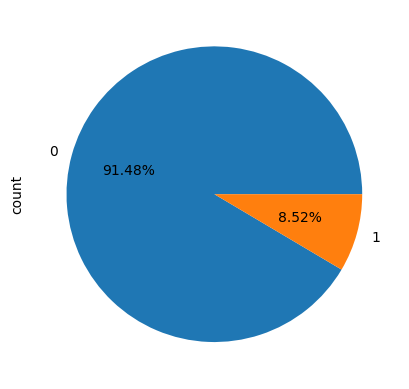

In [34]:
hrtrain.is_promoted.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

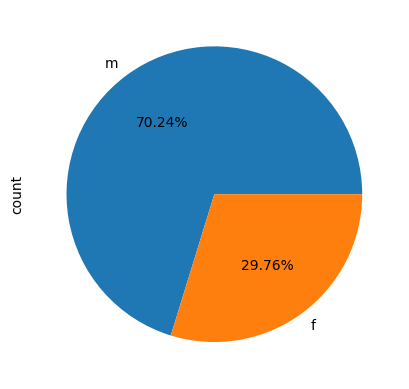

In [35]:
hrtrain.gender.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

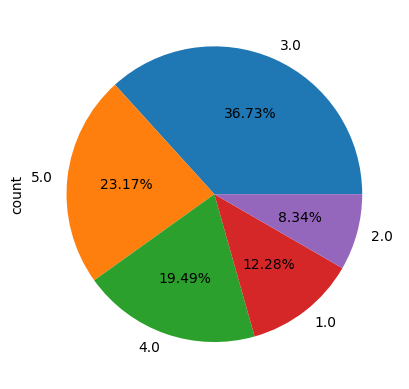

In [36]:
hrtrain.previous_year_rating.value_counts().plot(kind="pie",autopct="%.2f%%")

In [37]:
pd.crosstab(hrtrain.is_promoted,hrtrain.recruitment_channel)

recruitment_channel,other,referred,sourcing
is_promoted,,,
0,27890,1004,21246
1,2556,138,1974


In [38]:
pd.crosstab(hrtrain.is_promoted,hrtrain["KPIs_met >80%"])

KPIs_met >80%,0,1
is_promoted,,
0,34111,16029
1,1406,3262


In [39]:
pd.crosstab(hrtrain.is_promoted,hrtrain.age)

age,20,21,22,23,24,25,26,27,28,29,...,51,52,53,54,55,56,57,58,59,60
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,109,93,213,394,775,1230,1897,2566,2839,3111,...,355,323,350,289,276,243,233,197,192,203
1,4,5,18,34,70,69,163,261,308,294,...,34,28,14,24,18,21,5,16,17,14


### Data Aggregation

In [40]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [41]:
hrtrain.length_of_service.groupby(hrtrain.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [42]:
hrtrain.age.groupby(hrtrain.is_promoted).mean()

is_promoted
0    34.844037
1    34.372965
Name: age, dtype: float64

### Hypothesis Testing

#### Test Null Average avg_training_score of is_promoted 0 & 1 equal

In [43]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [44]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [45]:
# Null : There is no significant difference in the Average Training Score of people who got promoted when compare to people who are not promoted
# Alternative : There is a significant difference in the Average Training Score of people who got promoted when compare to people who are not promoted

In [46]:
notpromoted=hrtrain[hrtrain.is_promoted==0]
promoted=hrtrain[hrtrain.is_promoted==1]

In [47]:
from scipy.stats import ttest_ind

In [48]:
ttest_ind(notpromoted.avg_training_score,promoted.avg_training_score,equal_var=True)

TtestResult(statistic=-43.12107272186321, pvalue=0.0, df=54806.0)

In [49]:
# since the pvalue=0.0 is lessthan 0.05 we reject null hypothesis
# we may conclude that there is a significant difference in the average traning score of the people who are promoted when compare to people who are not promoted


#### Test Null Average Lenght_of_service of is_promoted 0 & 1 equal

In [50]:
hrtrain.length_of_service.groupby(hrtrain.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [51]:
hrtrain.length_of_service.groupby(hrtrain.is_promoted).var()

is_promoted
0    18.387278
1    16.062239
Name: length_of_service, dtype: float64

In [52]:
# Null : There is no significant difference in the Average length of service of people who got promoted when compare to people who are not promoted
# Alternative : There is a significant difference in the Average length of service of people who got promoted when compare to people who are not promoted

In [53]:
ttest_ind(notpromoted.length_of_service,promoted.length_of_service,equal_var=True)

TtestResult(statistic=2.4980306538722714, pvalue=0.012491446010434766, df=54806.0)

In [54]:
# since the pvalue=pvalue=0.012491446010434766 is lessthan 0.05 we reject null hypothesis
# we may conclude that there is a significant difference in the average length of service of the people who are promoted when compare to people who are not promoted


#### Test Null Average avg_training_score of different previous_year_rating equal

In [55]:
hrtrain.avg_training_score.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    60.064760
2.0    61.924024
3.0    64.197819
4.0    64.119773
5.0    63.781364
Name: avg_training_score, dtype: float64

In [56]:
# Null : There is no significant difference in average training score of different previous year rating
# Alternative : There is a significant difference in average training score of different previous year rating

In [57]:
one=hrtrain[hrtrain.previous_year_rating==1]
two=hrtrain[hrtrain.previous_year_rating==2]
three=hrtrain[hrtrain.previous_year_rating==3]
four=hrtrain[hrtrain.previous_year_rating==4]
five=hrtrain[hrtrain.previous_year_rating==5]

In [58]:
from scipy.stats import f_oneway

In [59]:
f_oneway(one.avg_training_score,two.avg_training_score,three.avg_training_score,four.avg_training_score,five.avg_training_score)

F_onewayResult(statistic=137.9606813012624, pvalue=1.7958355662933346e-117)

In [60]:
# since pvalue=1.7958355662933346e-117 is lessthan 0.05 we reject null hypothesis
# we may conclude that there is a significant difference in average training score of different previous year rating

#### Test Null Average length_of_service of different previous_year_rating equal

In [61]:
hrtrain.length_of_service.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    6.223686
2.0    6.241893
3.0    6.309324
4.0    6.193986
5.0    6.269142
Name: length_of_service, dtype: float64

In [62]:
# Null : There is no significant difference in average  length of service of different previous year rating
# Alternative : There is a significant difference in average length of service of different previous year rating

In [63]:
f_oneway(one.length_of_service,two.length_of_service,three.length_of_service,four.length_of_service,five.length_of_service)

F_onewayResult(statistic=1.4045457184008736, pvalue=0.22955174669633055)

In [64]:
# since pvalue=0.22955174669633055 is greater than 0.05 we failed to reject null hypothesis
# we may conclude that there is no significant difference in average  length of service of different previous year rating

#### Test Null No Association between is_promoted and gender

In [65]:
# Null : there no Association between is_promoted and gender
# Alternative : there is Association between is_promoted and gender

In [66]:
from scipy.stats import chi2_contingency

In [67]:
chi2_contingency(pd.crosstab(hrtrain.gender,hrtrain.is_promoted))

Chi2ContingencyResult(statistic=6.677254566546107, pvalue=0.009765091521176657, dof=1, expected_freq=array([[14922.70617428,  1389.29382572],
       [35217.29382572,  3278.70617428]]))

In [68]:
# since pvalue=0.009765091521176657 is lessthan 0.05 we reject null hypothesis 

#### Test Null No Association between is_promoted and 'KPIs_met > 80%'

In [69]:
# Null : there no Association between is_promoted and 'KPIs_met > 80%'
# Alternative : there is Association between is_promoted and 'KPIs_met > 80%'

In [70]:
chi2_contingency(pd.crosstab(hrtrain['KPIs_met >80%'],hrtrain.is_promoted))

Chi2ContingencyResult(statistic=2689.3220548467057, pvalue=0.0, dof=1, expected_freq=array([[32492.01539921,  3024.98460079],
       [17647.98460079,  1643.01539921]]))

In [71]:
# since pvalue=0.0 is lessthan 0.05 we reject null hypothesis

#### Test Null No Association between is_promoted and 'awards_won?'

In [72]:
# Null : there no Association between is_promoted and 'awards_won?'
# Alternative : there is Association between is_promoted and 'awards_won?'

In [73]:
chi2_contingency(pd.crosstab(hrtrain['awards_won?'],hrtrain.is_promoted))

Chi2ContingencyResult(statistic=2098.0719210465427, pvalue=0.0, dof=1, expected_freq=array([[48978.16596117,  4559.83403883],
       [ 1161.83403883,   108.16596117]]))

In [74]:
# since pvalue=0.0 is lessthan 0.05 we reject null hypothesis

### Spliting  the data into numeric columns and object columns

In [75]:
numcols=combinedf.select_dtypes(include=np.number)
objcols=combinedf.select_dtypes(include=["object"])

In [76]:
print(numcols.shape)
print(objcols.shape)

(78298, 4)
(78298, 10)


In [77]:
numcols.head()

,employee_id,age,length_of_service,avg_training_score
0,65438,35,8,49
1,65141,30,4,60
2,7513,34,7,50
3,2542,39,10,50
4,48945,45,2,73


In [78]:
numcols=numcols.drop("employee_id",axis=1)

In [79]:
objcols.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,5.0,1,0,0
1,Operations,region_22,Bachelor's,m,other,1,5.0,0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,3.0,0,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,1.0,0,0,0
4,Technology,region_26,Bachelor's,m,other,1,3.0,0,0,0


In [80]:
numcols["is_promoted"]=objcols.is_promoted

In [81]:
objcols=objcols.drop("is_promoted",axis=1)

In [82]:
numcols.shape

(78298, 4)

In [83]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

In [84]:
objcols_encoded=objcols.apply(LabelEncoder().fit_transform)

In [85]:
objcols_encoded.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?
0,7,31,2,0,2,0,4,1,0
1,4,14,0,1,0,0,4,0,0
2,7,10,0,1,2,0,2,0,0
3,7,15,0,1,0,1,0,0,0
4,8,18,0,1,0,0,2,0,0


In [86]:
combinedf_clean=pd.concat([numcols,objcols_encoded],axis=1)

In [87]:
combinedf_clean.tail()

,age,length_of_service,avg_training_score,is_promoted,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?
78293,24,1,61,test,3,11,1,1,2,0,2,0,0
78294,31,7,74,test,8,17,0,1,2,0,2,0,0
78295,26,4,50,test,2,7,0,0,2,0,3,0,0
78296,27,1,70,test,5,24,0,1,2,2,2,0,0
78297,40,5,89,test,8,8,2,1,0,2,4,1,0


In [88]:
# Splitting data back to test and train
train=combinedf_clean[combinedf_clean.is_promoted!="test"]
test=combinedf_clean[combinedf_clean.is_promoted=="test"]

In [89]:
# removing is promoted column from test 
test=test.drop("is_promoted",axis=1)

In [90]:
print(train.shape)
print(test.shape)

(54808, 13)
(23490, 12)


In [91]:
y=train.is_promoted
X=train.drop("is_promoted",axis=1)

In [92]:
X

,age,length_of_service,avg_training_score,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,KPIs_met >80%,awards_won?
0,35,8,49,7,31,2,0,2,0,4,1,0
1,30,4,60,4,14,0,1,0,0,4,0,0
2,34,7,50,7,10,0,1,2,0,2,0,0
3,39,10,50,7,15,0,1,0,1,0,0,0
4,45,2,73,8,18,0,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,48,17,78,8,5,0,1,2,0,2,0,0
54804,37,6,56,4,19,2,0,0,0,1,0,0
54805,27,3,79,0,0,0,1,0,0,4,1,0
54806,29,2,45,7,33,0,1,2,0,0,0,0


In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
y=LabelEncoder().fit_transform(y)

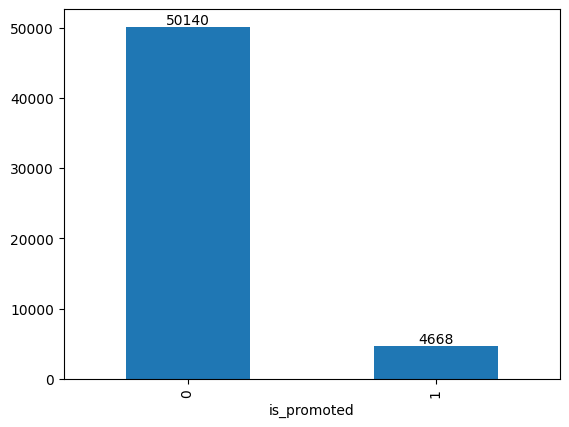

In [96]:
ax=train.is_promoted.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

### Model Building

### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logit=LogisticRegression(max_iter=3000)

In [99]:
from imblearn.over_sampling import SMOTEN

In [100]:
smote=SMOTEN(random_state=42)

In [101]:
X_smote,y_smote=smote.fit_resample(X,y)

In [102]:
logitmodel=logit.fit(X_smote,y_smote)

In [103]:
logitmodel.score(X_smote,y_smote)

0.7585560430793777

In [104]:
from sklearn.metrics import RocCurveDisplay,classification_report

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
cross_val_score(logit,X_smote,y_smote)

array([0.72287595, 0.7648584 , 0.7600718 , 0.76720183, 0.7703929 ])

In [107]:
np.mean([0.72287595, 0.7648584 , 0.7600718 , 0.76720183, 0.7703929 ])

0.757080176

In [108]:
logitpredict=logitmodel.predict(X_smote)

In [109]:
pd.crosstab(y_smote,logitpredict)

col_0,0,1
row_0,,
0,37473,12667
1,11545,38595


In [110]:
print(classification_report(y_smote,logitpredict))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76     50140
           1       0.75      0.77      0.76     50140

    accuracy                           0.76    100280
   macro avg       0.76      0.76      0.76    100280
weighted avg       0.76      0.76      0.76    100280



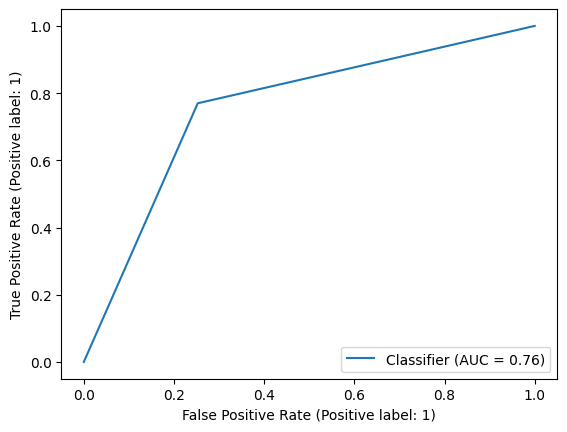

In [111]:
RocCurveDisplay.from_predictions(y_smote,logitpredict)

In [118]:
logitpredict=logitmodel.predict(test)

In [119]:
pd.DataFrame(logitpredict).to_csv('logit.csv')

### Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier

In [121]:
tree=DecisionTreeClassifier(max_depth=10)

In [122]:
treemodel=tree.fit(X_smote,y_smote)

In [123]:
treemodel.score(X_smote,y_smote)

0.8527323494216195

In [124]:
cross_val_score(tree,X_smote,y_smote)

array([0.79083566, 0.8572497 , 0.8570004 , 0.86009174, 0.85899481])

In [125]:
np.mean([0.79058636, 0.85710012, 0.85665138, 0.86009174, 0.85899481])

0.8446848819999999

In [126]:
treepredict=treemodel.predict(X_smote)

In [127]:
pd.crosstab(y_smote,treepredict)

col_0,0,1
row_0,,
0,41216,8924
1,5844,44296


In [128]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     50140
           1       0.83      0.88      0.86     50140

    accuracy                           0.85    100280
   macro avg       0.85      0.85      0.85    100280
weighted avg       0.85      0.85      0.85    100280



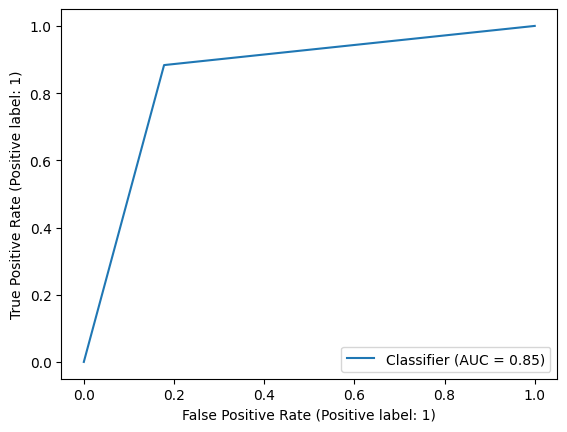

In [129]:
RocCurveDisplay.from_predictions(y_smote,treepredict)

In [130]:
treepredict=treemodel.predict(test)

In [131]:
pd.DataFrame(treepredict).to_csv("tree.csv")

### Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf=RandomForestClassifier(n_estimators=2000,max_depth=10)

In [134]:
rfmodel=rf.fit(X_smote,y_smote)

In [135]:
rfmodel.score(X_smote,y_smote)

0.871779018747507

In [136]:
cross_val_score(rf,X_smote,y_smote)

array([0.79462505, 0.87340447, 0.87345433, 0.87629637, 0.88023534])

In [137]:
np.mean([0.79357798, 0.87460112, 0.87410251, 0.87584763, 0.88123255])

0.8598723580000002

In [138]:
rfpredict=rfmodel.predict(X_smote)

In [139]:
pd.crosstab(y_smote,rfpredict)

col_0,0,1
row_0,,
0,40968,9172
1,3686,46454


In [140]:
print(classification_report(y_smote,rfpredict))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86     50140
           1       0.84      0.93      0.88     50140

    accuracy                           0.87    100280
   macro avg       0.88      0.87      0.87    100280
weighted avg       0.88      0.87      0.87    100280



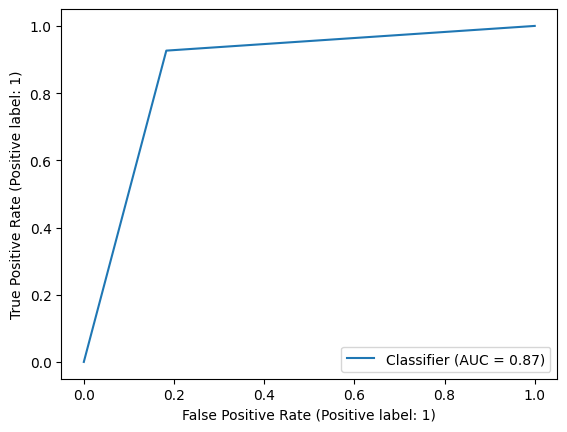

In [141]:
RocCurveDisplay.from_predictions(y_smote,rfpredict)

In [142]:
rfpredict=rfmodel.predict(test)

In [143]:
pd.DataFrame(rfpredict).to_csv("rf.csv")

### Gradient Boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
gbc=GradientBoostingClassifier(n_estimators=2000,max_depth=2)

In [146]:
gbcmodel=gbc.fit(X_smote,y_smote)

In [147]:
gbcmodel.score(X_smote,y_smote)

0.8865476665337056

In [148]:
cross_val_score(gbc,X_smote,y_smote)

array([0.82214799, 0.89399681, 0.89599122, 0.89379737, 0.89763662])

In [149]:
np.mean([0.82214799, 0.89399681, 0.89599122, 0.89379737, 0.89763662])

0.880714002

In [150]:
gbcpredict=gbcmodel.predict(X_smote)

In [151]:
pd.crosstab(y_smote,gbcpredict)

col_0,0,1
row_0,,
0,42754,7386
1,3991,46149


In [152]:
print(classification_report(y_smote,gbcpredict))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     50140
           1       0.86      0.92      0.89     50140

    accuracy                           0.89    100280
   macro avg       0.89      0.89      0.89    100280
weighted avg       0.89      0.89      0.89    100280



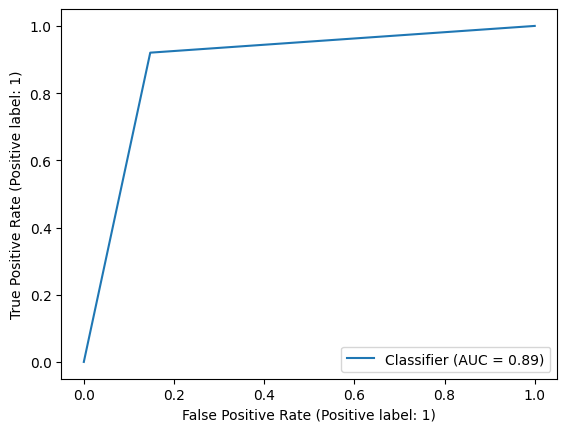

In [153]:
RocCurveDisplay.from_predictions(y_smote,gbcpredict)

In [154]:
gbcpredict=gbcmodel.predict(test)

In [155]:
pd.DataFrame(gbcpredict).to_csv("gbc.csv")

### Naive Bayes

In [156]:
from sklearn.naive_bayes import MultinomialNB

In [157]:
mnb=MultinomialNB()

In [158]:
mnbmodel=mnb.fit(X_smote,y_smote)

In [159]:
mnbmodel.score(X_smote,y_smote)

0.7006481850817711

In [160]:
cross_val_score(mnb,X_smote,y_smote)

array([0.66259473, 0.70881532, 0.70861588, 0.70966294, 0.71270443])

In [161]:
np.mean([0.66259473, 0.70881532, 0.70861588, 0.70966294, 0.71270443])

0.70047866

In [162]:
mnbpredict=mnbmodel.predict(X_smote)

In [163]:
pd.crosstab(y_smote,mnbpredict)

col_0,0,1
row_0,,
0,34042,16098
1,13921,36219


In [164]:
print(classification_report(y_smote,mnbpredict))

              precision    recall  f1-score   support

           0       0.71      0.68      0.69     50140
           1       0.69      0.72      0.71     50140

    accuracy                           0.70    100280
   macro avg       0.70      0.70      0.70    100280
weighted avg       0.70      0.70      0.70    100280



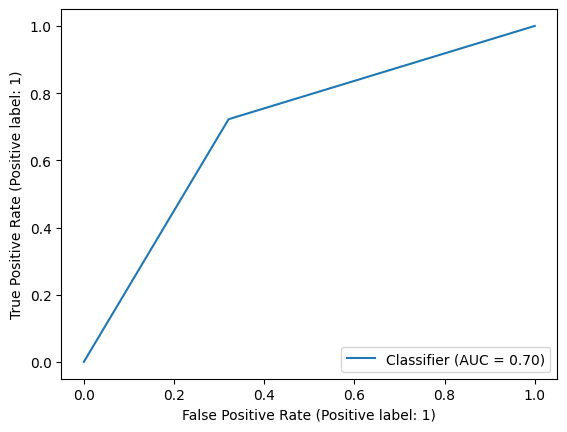

In [165]:
RocCurveDisplay.from_predictions(y_smote,mnbpredict)

In [166]:
nbpredict=mnbmodel.predict(test)

In [167]:
pd.DataFrame(nbpredict).to_csv("nb.csv")

### Support Vector Machine

In [168]:
from sklearn.svm import SVC

In [169]:
svc=SVC(C=4)

In [170]:
svcmodel=svc.fit(X_smote,y_smote)

In [171]:
svcmodel.score(X_smote,y_smote)

0.7861188671719186

In [173]:
svcpredict=svcmodel.predict(X_smote)

In [174]:
pd.crosstab(y_smote,svcpredict)

col_0,0,1
row_0,,
0,36498,13642
1,7806,42334


In [175]:
print(classification_report(y_smote,svcpredict))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77     50140
           1       0.76      0.84      0.80     50140

    accuracy                           0.79    100280
   macro avg       0.79      0.79      0.79    100280
weighted avg       0.79      0.79      0.79    100280



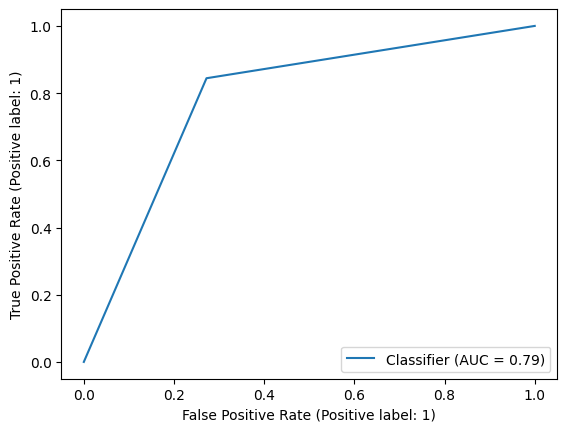

In [176]:
RocCurveDisplay.from_predictions(y_smote,svcpredict)

In [177]:
svcpredict=svcmodel.predict(test)

In [178]:
pd.DataFrame(svcpredict).to_csv("sv.csv")

## Validating the scores in Analytics Vidhya

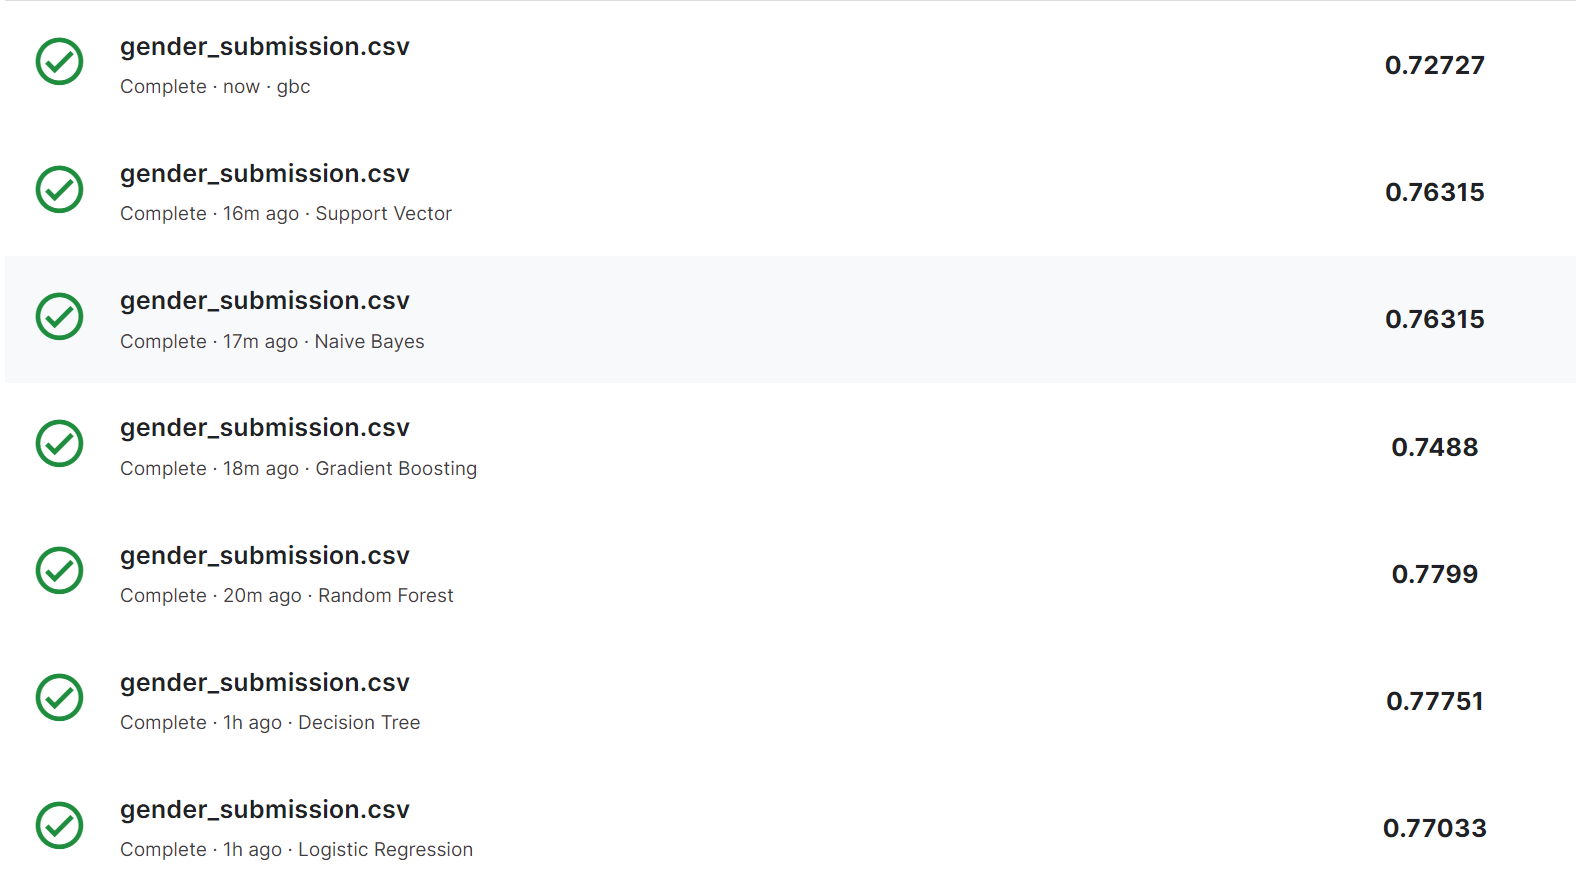

# Leaderboard of the competition

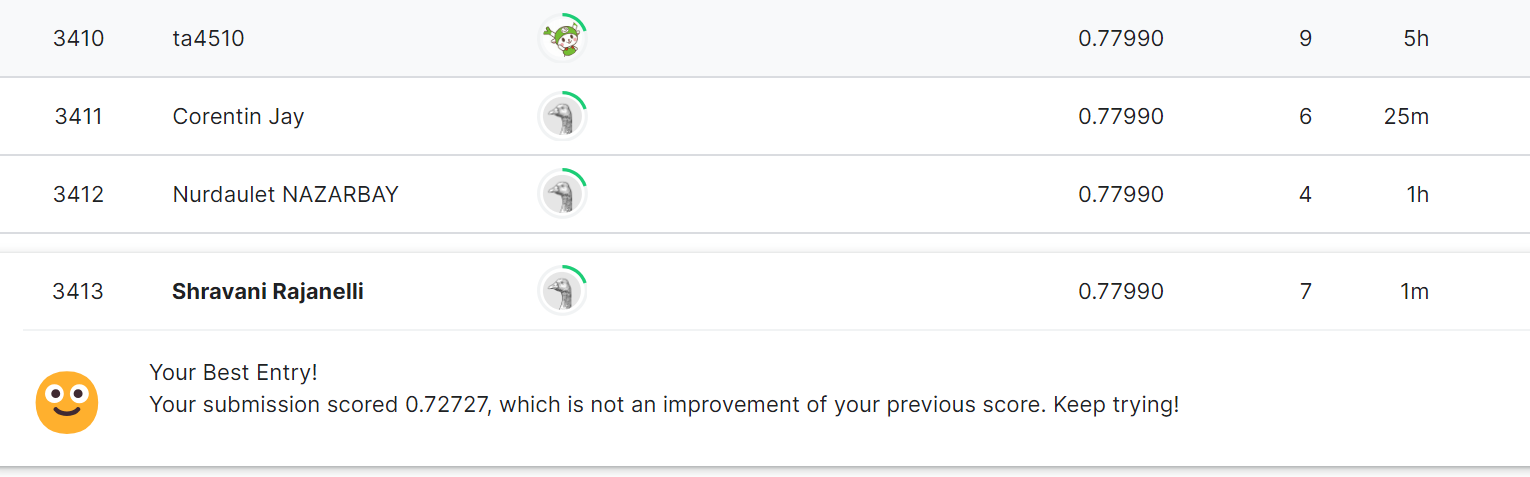

# Summary

After building and evaluating various machine learning models for , we have compiled additional information, including Precision,Recall (Sensitivity),F1-Score,ROC-AUC to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores,Accuracy,ROC-AUC values:

| Model Name | Accuracy | ROC-AUC |
|--|--|--|
| Logistic Regression | 0.7585560430793777 |0.76 |
| Decision Tree |0.8527323494216195 | 0.85|
| Random Forest |0.871779018747507 | 0.87|
| **Gradient Boosting Machine** | **0.8865476665337056** | **0.89**|
| Naive Bayes|0.7006481850817711|0.70|
| Support Vector Machine | 0.7861188671719186 |0.79|

The "Gradient Boosting Machine" model stands out with a significantly higher Accuracy score compared to its counterparts, indicating its superior predictive performance for this dataset. The higher Accuracy value suggests that the Gradient Boosting Machine model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for Classification tasks where Catogorical prediction accuracy is crucial.

In light of these findings, it's advisable to consider theGradient Boosting Machine model as a more reliable option for Classification analysis on the Titanic survival prediction dataset, prioritizing Accuracy as the key performance indicator scores.